In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import h5py as h5
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding, Dropout, Activation, Reshape
#from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [ ]:
dataset = pd.read_csv('sample_data/data_CKD_bigdata_refined.csv')


In [ ]:
dataset.head()

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038,2
1,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197,1
2,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640,1
3,1,11,48,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730,2
4,1,11,30,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492,1


In [ ]:
dataset.shape

(1000000, 29)

In [ ]:
dataset.isnull().sum()

sex                      0
age                      0
sido                     0
height                   0
weight                   0
waist                    0
vision_left              0
vision_right             0
listen_left              0
listen_right             0
BP_HIGH                  0
BP_LWST                  0
BLDS                     0
TOT_CHOLE                0
TRIGLYCERIDE             0
HDL_CHOLE                0
LDL_CHOLE                0
HMG                      0
OLIG_PROTE_CD            0
CREATININE               0
SGOT_AST                 0
SGPT_ALT                 0
GAMMA_GTP                0
SMK_STAT_TYPE_RSPS_CD    0
DRINK_OR_NOT             0
MOUTH_CHECK              0
BMI                      0
GFR                      0
stage                    0
dtype: int64

In [ ]:
 dataset[dataset['stage']<=2.5]

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038,2
1,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197,1
2,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640,1
3,1,11,48,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730,2
4,1,11,30,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,10,48,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,88.0,198.0,132.0,46.0,125.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0.0,0,26.122449,83.237802,2
999996,1,8,41,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,83.0,133.0,45.0,40.0,84.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0,25.951557,77.836416,2
999997,2,9,26,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,90.0,205.0,157.0,96.0,77.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1.0,0,20.811655,81.542158,2
999998,1,6,29,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,69.0,122.0,53.0,38.0,73.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0.0,0,19.591837,118.695643,1


In [ ]:
#dataset.iloc[:,:-1]

In [ ]:
#dataset.iloc[:,-1]

In [ ]:
# from sklearn.model_selection import train_test_split    
# from sklearn.preprocessing import MinMaxScaler
# from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# import keras.layers
# from tensorflow.keras.utils import to_categorical
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter
# # Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values
# # new_y = np.asarray(y)
# # (unique,counts) = np.unique(new_y,return_counts =True)
# # print(unique)
# # print(counts)
# # print(new_y.shape)
# oversample = RandomOverSampler(random_state=42)
# X_randomover, y_randomover = oversample.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_randomover, y_randomover, test_size=0.2, random_state = 2)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# y_train = to_categorical(y_train,dtype="uint8")
# # #print(y_train_new.shape)
# y_test = to_categorical(y_test,dtype ="uint8")
# print(y_test.shape)

# print(X_train.shape)
# print(X_test.shape)

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import keras.layers
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
#smote = SMOTE('minority')
# # Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values
# print(X.shape)
# print(y.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# X_train,y_train = smote.fit_resample(X_train,y_train)
# print(X_train.shape,y_train.shape)
# y_train = to_categorical(y_train,dtype="uint8")
# print(y_train.shape)
# y_test = to_categorical(y_test,dtype ="uint8")
# print(y_test.shape)

# print(X_train.shape)
# print(X_test.shape)

In [ ]:
# from sklearn.model_selection import train_test_split    
# from sklearn.preprocessing import MinMaxScaler
# from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# import keras.layers
# from tensorflow.keras.utils import to_categorical
# #from imblearn.over_sampling import RandomOverSampler
# from collections import Counter
# # Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values#from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter
# #oversample = RandomOverSampler(random_state=42)
# undersample = RandomUnderSampler(sampling_strategy='majority')
# #X_randomover, y_randomover = oversample.fit_resample(X, y)
# X_over,y_over = undersample.fit_resample(X, y)
# #X_over,y_over = undersample.fit_resample(X_over,y_over)
# #X_over,y_over = undersample.fit_resample(X_over,y_over)

In [ ]:
dataset = dataset.head(961570)
dataset

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038,2
1,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197,1
2,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640,1
3,1,11,48,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730,2
4,1,11,30,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961565,1,15,11,160,65,83.0,0.9,1.0,1.0,1.0,145.0,80.0,133.0,156.0,72.0,58.0,83.0,15.2,1.0,1.2,25.0,31.0,28.0,1.0,0.0,0,25.390625,62.317431,2
961566,2,13,29,155,70,86.0,0.9,0.9,1.0,1.0,130.0,80.0,110.0,217.0,75.0,60.0,142.0,12.1,1.0,0.7,28.0,24.0,17.0,1.0,0.0,0,29.136316,88.577832,2
961567,1,6,46,170,60,75.0,1.5,1.5,1.0,1.0,116.0,74.0,105.0,191.0,107.0,59.0,111.0,15.4,1.0,1.0,13.0,8.0,23.0,2.0,1.0,0,20.761246,91.748848,1
961568,1,12,11,170,70,81.0,0.8,1.2,1.0,1.0,138.0,86.0,89.0,204.0,166.0,59.0,112.0,14.3,1.0,1.1,20.0,19.0,33.0,2.0,1.0,1,24.221453,71.975078,2


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn import metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from collections import Counter
#Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#X = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_sm, y_sm = smt.fit_resample(X, y)

counter = Counter(y_sm)
print('After',counter)

Before Counter({2: 467376, 1: 457160, 3: 35069, 5: 985, 4: 980})
After Counter({2: 467376, 1: 467376, 3: 467376, 5: 467376, 4: 467376})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state = 2)

In [ ]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train )
y_train_hat = xg_reg.predict(X_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_hat)
train_rmse = np.sqrt(mean_squared_error(y_train , y_train_hat))
print ('R2: ',train_r2)
print ('RMSE: ', train_rmse)

[00:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2:  0.991068613437177
RMSE:  0.13363543662455782


In [ ]:
# from imblearn.combine import SMOTEENN
# counter = Counter(y)
# print('Before',counter)
# # oversampling the train dataset using SMOTE + ENN
# smenn = SMOTEENN()
# X_smenn, y_smenn = smenn.fit_resample(X,y)
# counter = Counter(y_smenn)
# print('After',counter)

In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(X_smenn, y_smenn, train_size=0.8, stratify = y_smenn, random_state=100)

In [ ]:
print(X_train.shape,y_train.shape)
y_train = to_categorical(y_train,dtype="uint8")
print(y_train.shape)
y_test = to_categorical(y_test,dtype ="uint8")
print(y_test.shape)


(1869504, 28, 1) (1869504, 6)
(1869504, 6, 2)
(467376, 6, 2)


In [ ]:

# strategy = {1:475386, 2:486184, 3:36377, 4:36377, 5:36377}
# smote = SMOTE(sampling_strategy=strategy)
# X_sm,y_sm =smote.fit_resample(X,y)
# print(len(X_sm))

# X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state = 2)
# # #print(y_train_new.shape)

# print(X_train.shape,y_train.shape)
# y_train = to_categorical(y_train,dtype="uint8")
# print(y_train.shape)
# y_test = to_categorical(y_test,dtype ="uint8")
# print(y_test.shape)


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (475386) in class 1 will be larger than the number of samples in the majority class (class #2 -> 467376)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (486184) in class 2 will be larger than the number of samples in the majority class (class #2 -> 467376)
  f"After over-sampling, the number of samples ({n_samples})"


KeyboardInterrupt: ignored

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)
print(X_test.shape)

(1869504, 28, 1)
(467376, 28, 1)


In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import time
def evaluate_model_CNN(X_train, X_val, y_train, y_val):
  model = LSTM
  timesteps=125
  dims=4
  model=Sequential()
#   model.add(LSTM(24,
#   dropout=0.2,return_sequences=True,
#   activation='tanh', recurrent_activation='tanh',recurrent_dropout=0.2,input_shape=(1,X_train.shape[2])))
#   model.add(LSTM(12, 
#   activation='tanh', recurrent_activation='tanh',
#   dropout=0.2,recurrent_dropout=0.2))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(keras.layers.Dense (128,activation='relu')) #input layer
  model.add(Dropout(0.4))
  model.add(keras.layers.Dense (64,activation='relu')) #input layer
  model.add(Dropout(0.4))
  model.add(keras.layers.Dense (32,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (16,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (6,activation='softmax')) #output
  epochs = 400
  batch_size = 64
  model.compile(loss='categorical_crossentropy', optimizer= Adam(lr=.001), metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs = 50,batch_size=5096,verbose=1)
  return history, model

#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
367/367 [==============================] - 69s 186ms/step - loss: 1.1052 - accuracy: 0.5358 - val_loss: 0.2222 - val_accuracy: 0.9433
Epoch 2/50
367/367 [==============================] - 64s 175ms/step - loss: 0.3483 - accuracy: 0.8883 - val_loss: 0.2540 - val_accuracy: 0.9149
Epoch 3/50
367/367 [==============================] - 65s 178ms/step - loss: 0.2469 - accuracy: 0.9236 - val_loss: 0.2288 - val_accuracy: 0.9260
Epoch 4/50
367/367 [==============================] - 64s 176ms/step - loss: 0.1895 - accuracy: 0.9443 - val_loss: 0.1889 - val_accuracy: 0.9449
Epoch 5/50
367/367 [==============================] - 61s 167ms/step - loss: 0.1612 - accuracy: 0.9541 - val_loss: 0.2175 - val_accuracy: 0.9432
Epoch 6/50
367/367 [==============================] - 60s 163ms/step - loss: 0.1471 - accuracy: 0.9587 - val_loss: 0.0967 - val_accuracy: 0.9693
Epoch 7/50
367/367 [==============================] - 65s 176ms/step - loss: 0.1334 - accuracy: 0.9629 - val_loss: 0.0721 - val_ac

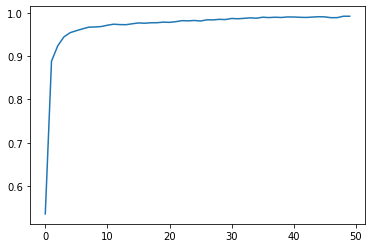

In [ ]:
n_folds = 1
cv_scores, model_history = list(), list()
#for _ in range(n_folds):  
  # split data
  # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
  # evaluate model
  # print(X_train.shape)
  # print(y_train.shape)
  # print(X_test.shape)
  # print(y_test.shape)
start_time = time.time()
model = tf.keras.Sequential()
history, model= evaluate_model_CNN(X_train, X_test, y_train, y_test)
# list all data in history
print(history.history.keys())
print("--- %s seconds ---" % (time.time() - start_time))
# summarize history for accuracy
plt.plot(history.history['accuracy'])

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.38796643e-09
  1.00000000e+00 6.44802632e-36]
 [1.53863005e-16 7.48695982e-07 9.99988556e-01 1.07544165e-05
  2.18335935e-15 1.22719461e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [3.51806300e-17 4.16768444e-07 9.99992251e-01 7.37130995e-06
  3.27188710e-16 6.53713927e-09]
 [6.61849112e-17 5.40853705e-07 9.99991059e-01 8.33345257e-06
  7.20928958e-16 8.68369732e-09]
 [4.30882485e-09 6.14267707e-01 3.78872871e-01 8.68257302e-06
  3.76459931e-14 6.85069757e-03]]
[4 2 5 ... 2 2 1]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))
# pl.plot()
# plt.show()

[[87386  6060     0     0   125]
 [    0 92492   647     0    47]
 [    0    10 93504    20     0]
 [    0     0     0 93383     0]
 [    0    64     0     9 93629]]


In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))


Accuracy: 0.99



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

0.9850612782855773
0.9850612782855773
0.9850612782855773


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']))





Classification Report

              precision    recall  f1-score   support

     Stage 1       1.00      0.93      0.97     93571
     Stage 2       0.94      0.99      0.96     93186
     Stage 3       0.99      1.00      1.00     93534
     Stage 4       1.00      1.00      1.00     93383
     Stage 5       1.00      1.00      1.00     93702

    accuracy                           0.99    467376
   macro avg       0.99      0.99      0.99    467376
weighted avg       0.99      0.99      0.99    467376



In [ ]:
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']

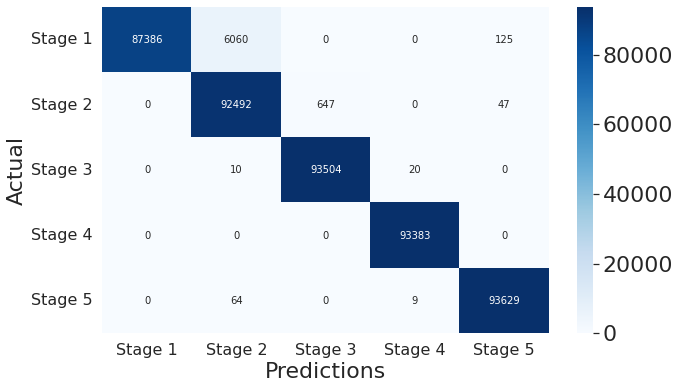

In [ ]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (10, 6))
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 2)
sn.heatmap(df_cm,annot=True,annot_kws={"size":10},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=22)
plt.ylabel('Actual',fontsize=22)
plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.savefig('CNN-ANN_ConfusionMatrix.png', dpi=300)
# from mlxtend.plotting import plot_confusion_matrix
# fig,ax = plot_confusion_matrix(conf_mat = mat,fontsize=20)
# plt.xlabel('Predictions',fontsize=18)
# plt.ylabel('Actual',fontsize=18)
# plt.show()

In [ ]:
from google.colab import files
files.download('CNN-ANN_ConfusionMatrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

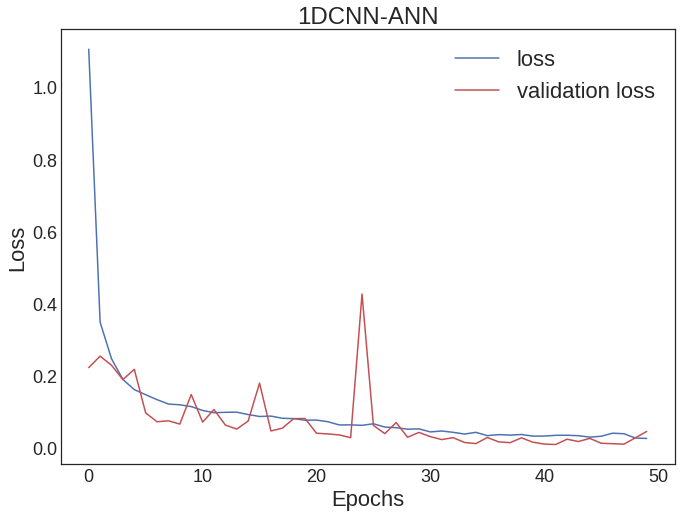

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.style.use('seaborn-white')
#fig = plt.subplots(1,1, figsize = (12, 8))
fig.set_size_inches(11,8, forward=True)
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('1DCNN-ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.draw()
plt.savefig('CNN-ANN_100sec.png', dpi=300)

In [ ]:
from google.colab import files
files.download('CNN-ANN_100sec.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC score: 0.9906691930285121


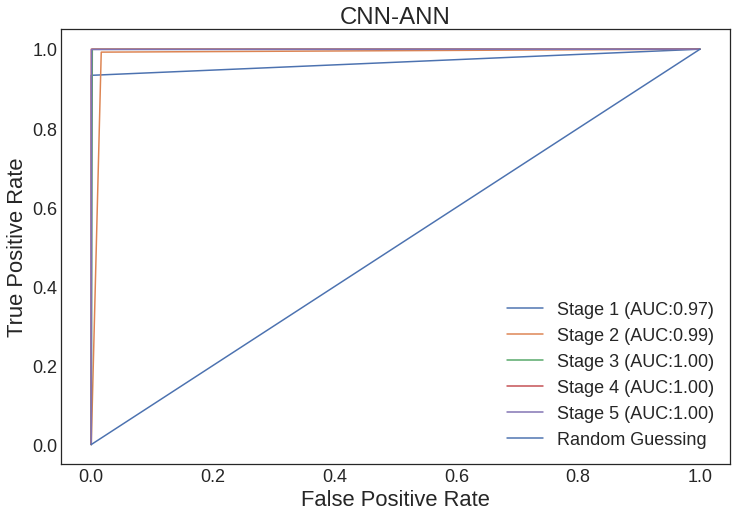

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('CNN-ANN',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('1DCNN-ANN_AUC.png', dpi=300)
plt.show()


In [ ]:
from google.colab import files
files.download('CNN-ANN_AUC.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.layers import Dense, SimpleRNN
def evaluate_model_SimpleRNN(X_train, X_val, y_train, y_val):
  model = SimpleRNN
  timesteps=125
  dims=4
  model = Sequential()
  model.add(SimpleRNN(units=16, input_shape=(X_train.shape[1],1), activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(32, activation="relu"))  
  model.add(Dropout(0.2))
  model.add(keras.layers.Dense (64,activation='relu')) #input layer
  model.add(Dropout(0.2))
  # model.add(keras.layers.Dense (64,activation='relu')) #input layer
  # model.add(Dropout(0.2))
  model.add(Dense (26,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(Dense (16,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (6,activation='softmax')) #output

  epochs = 400
  batch_size = 64
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=20, batch_size=1024, verbose=1)
  # val_acc = model.evaluate(X_val, y_val, verbose = 1)
  # predictions = model.predict_classes(X_test)
  # print(classification_report(y_test,predictions))
  # print(confusion_matrix(y_test,predictions))
  return history, model

Epoch 1/20
1826/1826 [==============================] - 43s 23ms/step - loss: 0.4345 - accuracy: 0.8381 - val_loss: 0.3786 - val_accuracy: 0.8401
Epoch 2/20
1826/1826 [==============================] - 41s 23ms/step - loss: 0.2457 - accuracy: 0.9114 - val_loss: 0.3213 - val_accuracy: 0.8871
Epoch 3/20
1826/1826 [==============================] - 41s 23ms/step - loss: 0.1951 - accuracy: 0.9308 - val_loss: 0.2845 - val_accuracy: 0.9088
Epoch 4/20
1826/1826 [==============================] - 42s 23ms/step - loss: 0.1665 - accuracy: 0.9423 - val_loss: 0.1810 - val_accuracy: 0.9360
Epoch 5/20
1826/1826 [==============================] - 40s 22ms/step - loss: 0.1461 - accuracy: 0.9509 - val_loss: 0.1575 - val_accuracy: 0.9486
Epoch 6/20
1826/1826 [==============================] - 40s 22ms/step - loss: 0.1319 - accuracy: 0.9568 - val_loss: 0.1417 - val_accuracy: 0.9556
Epoch 7/20
1826/1826 [==============================] - 41s 22ms/step - loss: 0.1220 - accuracy: 0.9615 - val_loss: 0.4776 -

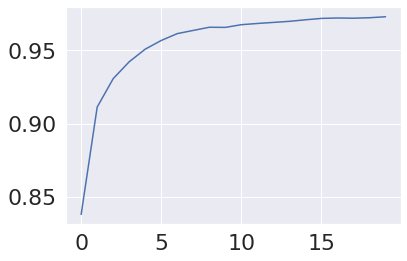

In [ ]:
n_folds = 1
cv_scores, model_history = list(), list()
#for _ in range(n_folds):  
  # split data
  # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
  # evaluate model
  # print(X_train.shape)
  # print(y_train.shape)
  # print(X_test.shape)
  # print(y_test.shape)
model = tf.keras.Sequential()
history, model= evaluate_model_SimpleRNN(X_train, X_test, y_train, y_test)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.02989504e-17
  9.99974132e-01 2.58663222e-05]
 [2.34844586e-15 1.33643975e-04 9.85095441e-01 4.42226064e-06
  7.12829618e-09 1.47664221e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [4.80349716e-15 3.78388766e-04 9.83104765e-01 1.80350710e-07
  3.02107184e-09 1.65165253e-02]
 [4.32336119e-15 4.58855247e-05 9.86216068e-01 1.12557132e-03
  1.13725825e-07 1.26123372e-02]
 [0.00000000e+00 8.87762308e-01 6.25831261e-02 0.00000000e+00
  0.00000000e+00 4.96545956e-02]]
[4 2 5 ... 2 2 1]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))
# pl.plot()
# plt.show()

[[90634  2937     0     0     0]
 [   18 89781  3387     0     0]
 [    0     0 93429   105     0]
 [    0     0     0 93353    30]
 [ 1923  2133    67    22 89557]]


In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))


Accuracy: 0.98



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

0.9772731162918079
0.9772731162918079
0.9772731162918079


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']))


Classification Report

              precision    recall  f1-score   support

     Stage 1       0.98      0.97      0.97     93571
     Stage 2       0.95      0.96      0.95     93186
     Stage 3       0.96      1.00      0.98     93534
     Stage 4       1.00      1.00      1.00     93383
     Stage 5       1.00      0.96      0.98     93702

    accuracy                           0.98    467376
   macro avg       0.98      0.98      0.98    467376
weighted avg       0.98      0.98      0.98    467376



In [ ]:
from google.colab import files
files.download('CNN-ANN_ConfusionMatrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

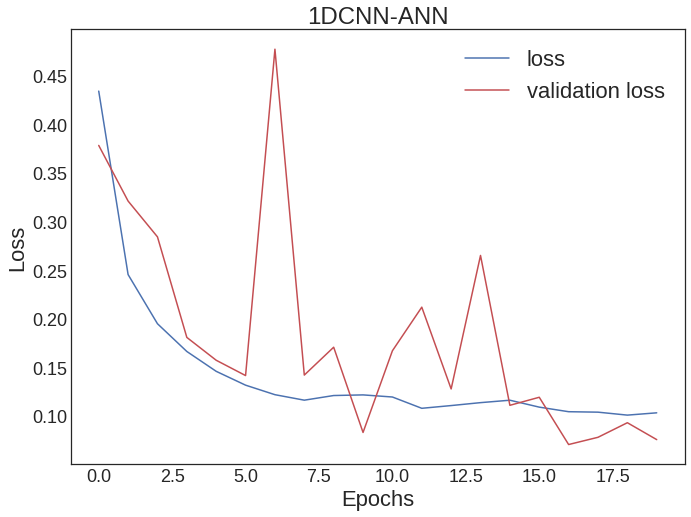

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.style.use('seaborn-white')
#fig = plt.subplots(1,1, figsize = (12, 8))
fig.set_size_inches(11,8, forward=True)
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('1DCNN-ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.draw()
plt.savefig('CNN-ANN_100sec.png', dpi=300)

In [ ]:
from google.colab import files
files.download('CNN-ANN_100sec.png') 

ROC AUC score: 0.9857991547116803


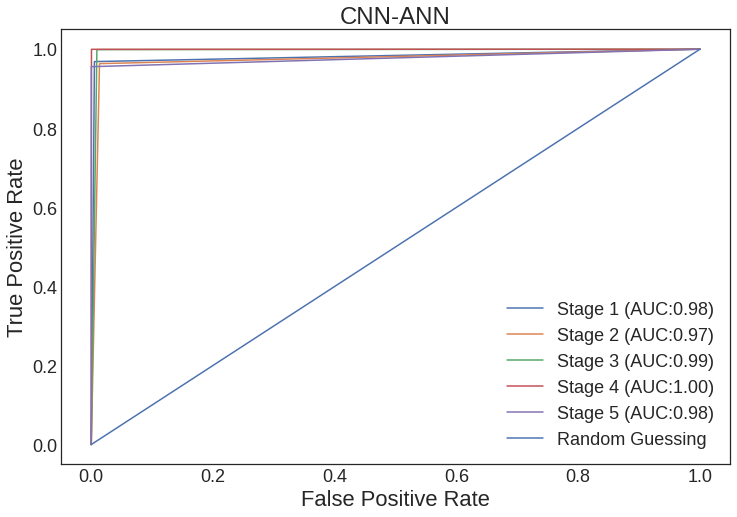

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('CNN-ANN',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('1DCNN-ANN_AUC.png', dpi=300)
plt.show()

In [ ]:
from tensorflow import keras
model = Sequential()
model.add(keras.layers.Dense (15,input_shape=(X_train.shape[1],),activation='relu')) #input layer
model.add(keras.layers.Dense (10,activation='relu')) #hidden
model.add(keras.layers.Dense (5,activation='softmax')) #output
model.compile(
    optimizer = 'rmsprop',
    loss = 'mse',
    metrics = ['accuracy']
)
history = model.fit(X_train, y_train, epochs=200,batch_size = 32, validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/200


ValueError: ignored